# Spam-Ham Prediction

### importing general modules

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


### getting the data

In [3]:
data=pd.read_csv('spam.xls')

In [4]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Getting to know about the data

In [5]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
(data['Category']=='ham').sum()

4825

In [7]:
(data['Category']=='spam').sum()

747

### addding new fields (feature Engineering)

In [8]:
import nltk
data['characters']=data['Message'].apply(len)
data['words']=data.apply(lambda row:nltk.word_tokenize(row['Message']),axis=1).apply(len)
data['sentences']=data.apply(lambda row:nltk.sent_tokenize(row['Message']),axis=1).apply(len)
data.head()

,Category,Message,characters,words,sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### plotting things to crop the data

<Figure size 1200x800 with 0 Axes>

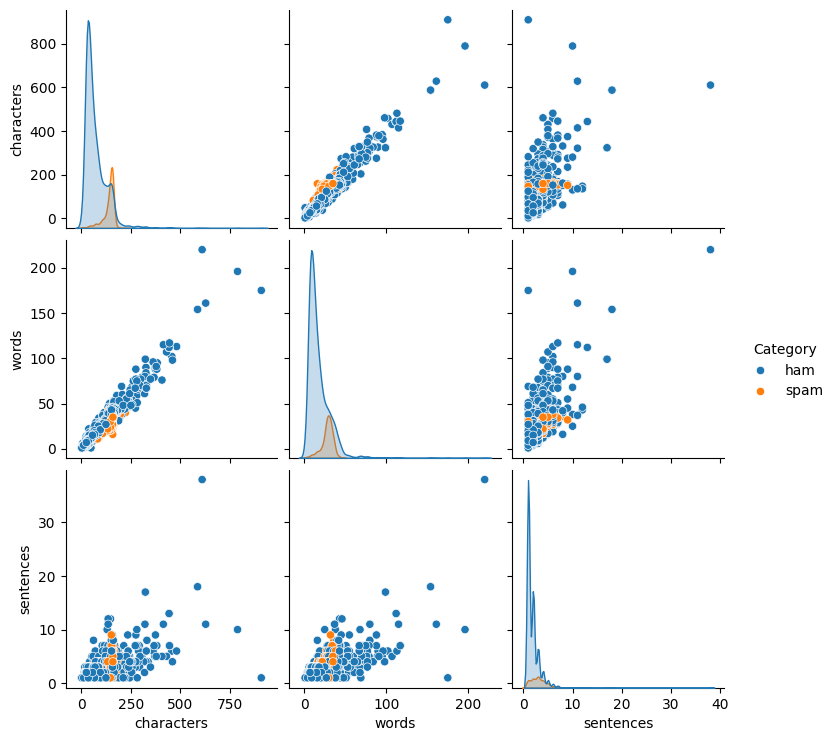

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Category")
plt.show(fg)

In [10]:
data=data[(data['words']<80)]
data.shape

(5542, 5)

#### Cleaning the text

In [11]:

def clean(text):
    clrtxt=text.lower()
    clrtxt2=''
    for i in clrtxt:
        if i==' ':
            clrtxt2+=' '
        elif ord(i) < ord('a') or ord(i) > ord('z'):
            clrtxt2+=''
        else:
            clrtxt2+=i
    return clrtxt2
data['clean_text']=data['Message'].apply(clean)
data.head()
    
        

,Category,Message,characters,words,sentences,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i dont think he goes to usf he lives aroun...


#### converting clean text to tokens

In [12]:
#tokenization
data['tokenize_text']=data.apply(lambda row:nltk.word_tokenize(row['clean_text']),axis=1)
data.head()

,Category,Message,characters,words,sentences,clean_text,tokenize_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [13]:
#removing stopwords
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words=set(stopwords.words('english'))
    filtered= [i for i in text if i not in stop_words]
    return filtered

data['without_stop_words']=data['tokenize_text'].apply(remove_stopwords)

data.head()

,Category,Message,characters,words,sentences,clean_text,tokenize_text,without_stop_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


#### lemmatizing the cleaned tokens

In [14]:


from nltk.stem import WordNetLemmatizer

def lemmatizer(text):
    lemma=[WordNetLemmatizer().lemmatize(word,pos='v') for word in text]
    return lemma

data['lemmatized_text'] = data['without_stop_words'].apply(lemmatizer)

data.head()

,Category,Message,characters,words,sentences,clean_text,tokenize_text,without_stop_words,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, live, around, though]"


#### converting words to float

In [15]:
#vectorizing 
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=[]
for i in data['lemmatized_text']:
    msg=" ".join([row for row in i])
    corpus.append(msg)
#text to number

X=TfidfVectorizer().fit_transform(corpus).toarray()

X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Red Hot Encoding the Category field

In [16]:
#label Encoder

from sklearn.preprocessing import LabelEncoder

data['Category']=LabelEncoder().fit_transform(data['Category'])

data.head()


,Category,Message,characters,words,sentences,clean_text,tokenize_text,without_stop_words,lemmatized_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, live, around, though]"


##### getting the value to predict

In [17]:
y=data['Category']


#### Splitting the X and Y to train and test data

In [18]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

### Fitting the data

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

ypred=rfc.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1425
           1       1.00      0.75      0.86       238

    accuracy                           0.96      1663
   macro avg       0.98      0.88      0.92      1663
weighted avg       0.97      0.96      0.96      1663

